Mounted at /content/gdrive
Start of file: 'Gammaproteobacteria,0.04415611593596317,0.09294976'
End of file: '\nGadus,0.0,0.0,0.0,0.0,0.00027104678267468965,0.0\n'


10 {'Gammaproteobacteria': [22.64691943127962, 10.758499413833528, 12.166951566951566, 14.055424528301888, 9.538262668045501, 12.2981843575419], 'Beggiatoa': [10.205018686599038, 60.97674418604652, 34.1648, 183.36923076923077, 292.8095238095238, 195.67777777777778], 'Deltaproteobacteria': [29.795791114575213, 46.231738035264485, 36.43856655290102, 32.5655737704918, 86.6056338028169, 41.83135391923991], 'Desulfobacterium': [29.565351894818253, 59.98039215686274, 56.044619422572175, 42.87410071942446, 89.98536585365854, 51.64516129032258], 'Nitrosopumilus': [283.1703703703704, 53.04624277456647, 79.08518518518518, 100.15966386554622, 18.447, 93.67553191489363], 'Bacteroides': [50.3, 65.55, 70.70529801324504, 62.40314136125654, 106.01724137931033, 61.362369337979096], 'Desulfatibacillum': [45.72727272727273, 73.12350597609561,

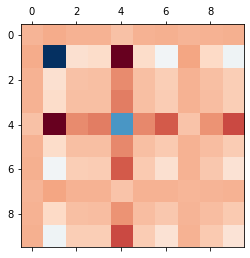

['Gammaproteobacteria', 'Beggiatoa', 'Deltaproteobacteria', 'Desulfobacterium', 'Nitrosopumilus', 'Bacteroides', 'Desulfatibacillum', 'Planctomyces', 'Geobacter', 'Desulfococcus']


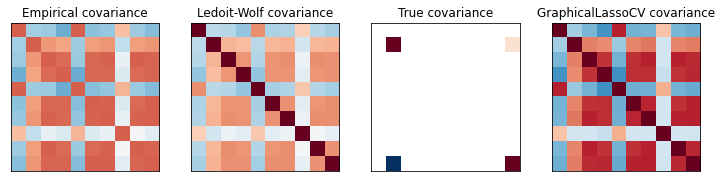

NameError: ignored

In [2]:
# Covariance = SUM((x - xmean) * (y - ymean)) / (N - 1) 
import numpy as np
from scipy import linalg
from sklearn.covariance import GraphicalLassoCV, ledoit_wolf, empirical_covariance
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 200)
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from google.colab import drive
drive.mount('/content/gdrive')
# #############################################################################
infile = "/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Genus.Frqs.All.MGs.Joined.csv"
with open(infile, 'r') as f:
  data = f.read() 
  print('Start of file:',repr(data[:50]))
  print('End of file:', repr(data[-50:]))
f.close()
lines = data.split('\n')
lines.pop()

n_samples = 10
n_features = len(lines[0]) -1
table, genera = [], []
for x in range(n_samples):
  row = lines[x].split(',')
  genera.append(row[0])
  for y in range(1, len(row)):
    row[y] = 1/float(row[y]) 
  table.append(row[1:])
print()
#print('table:\n', table)
print()

frame ={}
for x in range(len(table)):
  frame[ genera[x] ] = table[x]  
print(len(frame), frame)

df = pd.DataFrame(frame)
print()
#print('df covariance:\n', empirical_covariance(df))
print()

print('df', df)
covMatrix = pd.DataFrame.cov(df)
#print ('covMatrix:\n', covMatrix)
print()
print('covMatrix:')
plt.matshow(covMatrix, cmap='RdBu')  #RdBu_r, spring, autumn, Reds, plasma, RdPu, Purples, jet
plt.show()

cov = linalg.inv(covMatrix)
d = np.sqrt(np.diag(cov))
cov /= d
cov /= d[:, np.newaxis]
covMatrix *= d
covMatrix *= d[:, np.newaxis]
X = df
X -= X.mean(axis=0)
X /= X.std(axis=0)

# #############################################################################
# Estimate the covariance
emp_cov = np.dot(X.T, X) / n_samples

model =  GraphicalLassoCV()  #empirical_covariance)
model.fit(X)
covGL = model.covariance_
prec_ = model.precision_

lw_cov_, _ = ledoit_wolf(X)
lw_prec_ = linalg.inv(covGL)

# #############################################################################
# Plot the results
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.02, right=0.98)

# plot the covariances
covs = [('Empirical', emp_cov), ('Ledoit-Wolf', lw_cov_), ('True', cov),  ('GraphicalLassoCV', covGL)]

#print('Graphical Lasso Covariance:\n', cov_)
print(genera)       
vmax = covGL.max()
for i, (name, this_cov) in enumerate(covs):
    plt.subplot(2, 4, i + 1)
    plt.imshow(this_cov, interpolation='nearest', vmin=-vmax, vmax=vmax,
               cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.title('%s covariance' % name)
plt.show()
vmax = cov_.max()
plt.imshow(this_cov, interpolation='nearest', vmin=-vmax, vmax=vmax,
          cmap=plt.cm.RdBu_r)
plt.xticks(())
plt.yticks(())
plt.title('GraphicalLassoCV')
plt.show()